In [1]:
pip install adjustText


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import adjustText
from adjustText import adjust_text

In [5]:
import pandas as pd

pd.read_csv('gwas_trimmed.txt', sep='\t', nrows=100)

df = pd.read_csv('gwas_trimmed.txt', sep='\t') # Make the table readable using pandas

# -log the P-values
import numpy as np
-np.log(df['P_VALUE'])
# Add the -logp column to the table
df['-logp']= - np.log(df['P_VALUE'])

# Group the 'regions' together
for region, group_df in df.groupby('REGION'):
    print(region)
    
# Put variants in order by max position in chromosome
running_pos = 0

cumulative_pos = []

for region, group_df in df.groupby('REGION'):
    cumulative_pos.append(group_df['CHR_POS'] + running_pos)
    running_pos+= group_df['CHR_POS'].max()
    
# Position of variant relative to whole chromosome, add column to the table

df['cumulative_pos'] = pd.concat(cumulative_pos)

# Create SNP number for indexing
df['SNP number']=df.index


import seaborn as sns
%matplotlib inline

# Create Manhatton plot for cumulative position vs -logp 
#sns.relplot(
    #data = df.sample(21), # for whole genome this number will be 10000, or however many you want to see
   # x= 'cumulative_pos',
   # y= '-logp',
    #aspect = 2, # for whole genome this will need to be tweaked to maybe 4
  #  hue = 'REGION' # for whole genome this will be changed to 'CHR' -chromosome)

6p21.32
6p22.2
6p25.3
6q15
6q22.32
6q23.3
6q25.3
6q27


In [6]:
df

,Unnamed: 0,SNPS,REGION,CHR_POS,P_VALUE,MAPPED_GENE,-logp,cumulative_pos,SNP number
0,14702,rs1538171,6q22.32,126431738,7.000000e-10,CENPW - MIR588,21.079941,276247167,0
1,19605,rs4320356,6p22.2,26423332,3.000000e-08,BTN2A3P,17.322068,59123465,1
2,19607,rs1770,6p21.32,32660056,2.000000e-232,"HLA-DQB1, HLA-DQB1, HLA-DQB1, HLA-DQB1, HLA-DQ...",533.506594,32660056,2
3,147068,rs2647044,6p21.32,32700133,1.000000e-16,HLA-DQB1 - MTCO3P1,36.841361,32700133,3
4,148075,rs11755527,6q15,90248512,5.000000e-08,BACH2,16.811243,149796892,4
5,148091,rs9388489,6q22.32,126377573,4.000000e-13,CENPW - NA,28.547312,276193002,5
6,148101,rs9268645,6p21.32,32440750,1.000000e-100,"HLA-DRA, HLA-DRA, HLA-DRA, HLA-DRA, HLA-DRA",230.258509,32440750,6
7,150950,rs9272346,6p21.32,32636595,6.000000e-129,HLA-DQA1,295.241718,32636595,7
8,154931,rs3757247,6q15,90247744,1.000000e-06,BACH2,13.815511,149796124,8
9,174350,rs924043,6q27,170063801,8.000000e-09,NaN,18.643824,743042646,9


10

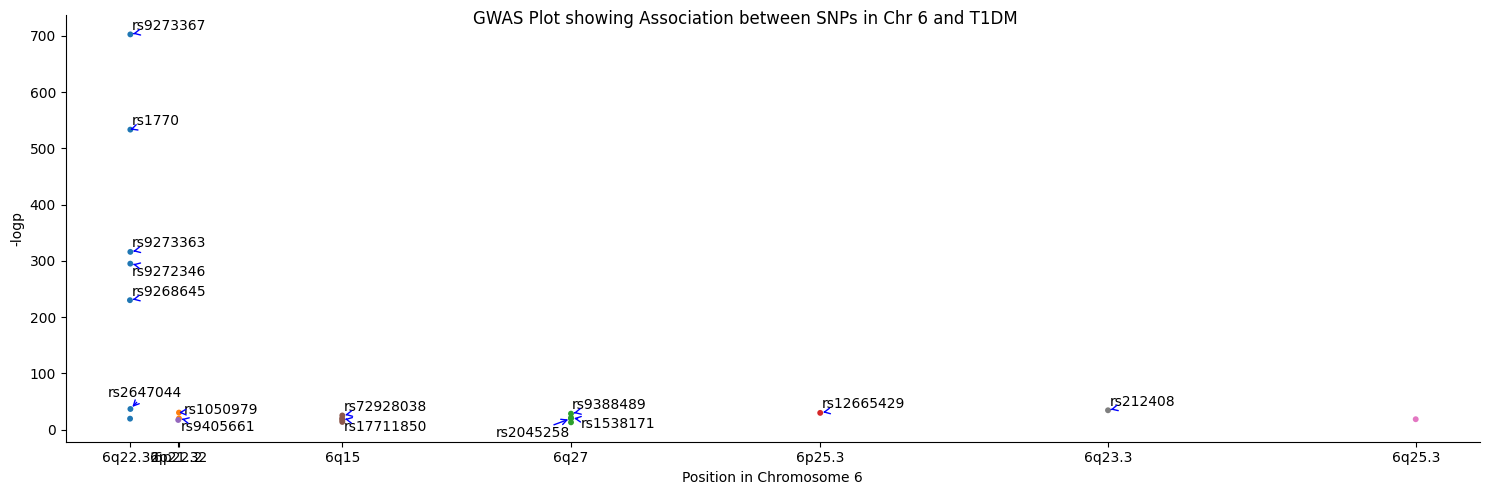

In [10]:
my_data = df.sample(21)

g=sns.relplot(
    data = my_data, # for whole genome this number will be 10000, or however many you want to see
    x= 'cumulative_pos',
    y= '-logp',
    aspect = 3, # for whole genome this will need to be tweaked to maybe 4
    hue = 'REGION', # for whole genome this will be changed to 'CHR' -chromosome
    linewidth=0,
    size=4,
    legend=None
)

# Editing x-axis and making it neater
g.ax.set_xlabel('Position in Chromosome 6') #for whole genome this will be 'Chromosome'

# Setting where the labels in the x-axis should be
g.ax.set_xticks(df.groupby('REGION')['cumulative_pos'].median())

g.ax.set_xticklabels(df['REGION'].unique())


# Add title to graph
g.fig.suptitle('GWAS Plot showing Association between SNPs in Chr 6 and T1DM')

# Create annotations for each SNP point
annotations = my_data[my_data['-logp'] > 20].apply(lambda p : g.ax.annotate(p['SNPS'], (p['cumulative_pos'], p['-logp'])), axis=1).to_list()

adjust_text(annotations, arrowprops = {'arrowstyle': '->', 'color':'blue'})